In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from CHAMP.DataLoader import LoadFaceDB
from CHAMP.Monitor import DisplayDico, DisplayConvergenceCHAMP
from CHAMP.CHAMP_Layer import CHAMP_Layer
from CHAMP.CHAMP_Layer import ConvMP
from CHAMP.DataTools import GenerateGabor, Rebuilt
import matplotlib.pyplot as plt

import os
home = os.getenv('HOME')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load the DataBase

In [3]:
path = "../../../Science/These/Rapport d'avancement/database/Face_DataBase/"
#path = home + "/science/VB_These/Rapport d'avancement/database/Face_DataBase/"
training_set = LoadFaceDB(path, nb_batch=1,Decorrelated=True,Normalized=False)

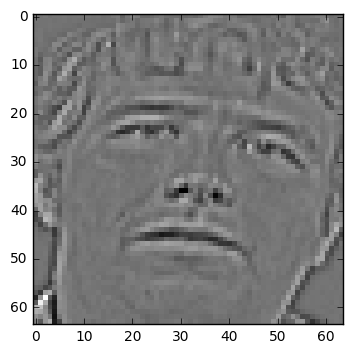

In [4]:
plot = plt.imshow(training_set[0][0,0,0,:,:].numpy(),cmap='gray')

### Generate Filters

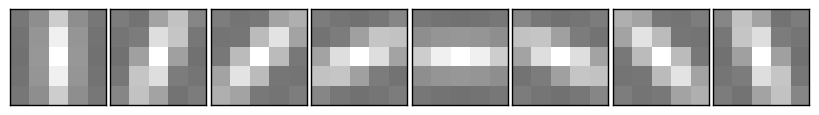

In [4]:
DicoGabor = GenerateGabor(nb_dico=8,dico_size=(5,5),sigma=1,lambd=5,gamma=0.5,psi=0)
DisplayDico(DicoGabor)

### Coding

In [5]:
code = ConvMP(image_input=training_set[0][0,:,:,:,:], dictionary=DicoGabor, l0_sparseness=100,
                modulation=None, verbose=0, train=True, doSym='pos', mask=None,\
                MaskMod='Residual')

In [6]:
reconstructed_image = Rebuilt(training_set[0][0,:,:,:,:],code,DicoGabor)

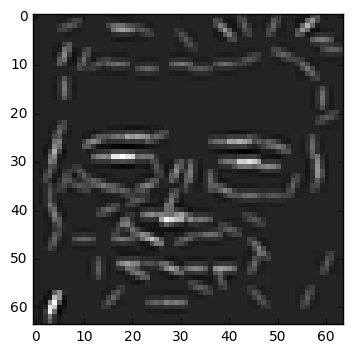

In [7]:
plt.imshow(reconstructed_image[0,0,:,:].numpy(),cmap='gray')

In [8]:
residual=training_set[0][0,:,:,:,:]-reconstructed_image

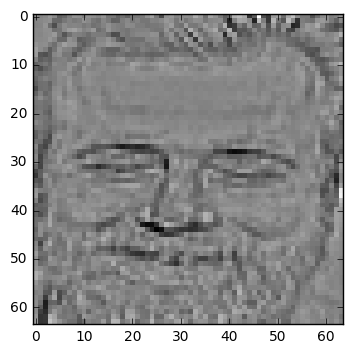

In [9]:
plt.imshow(residual[0,0,:,:].numpy(),cmap='gray')

### Classifying



Columns 0 to 12 
    8    11    29     7     5    26    32    29    31     6     4    27    25

Columns 13 to 25 
   30    33    35    11    28    36    38     0     3     7    15    38     3

Columns 26 to 38 
   19     6    21    38    20    23     5    17    15    10     8    38    31

Columns 39 to 51 
    4    17    36    18    23    22    26    13    25    18    19    37    30

Columns 52 to 64 
    4    10    23    15    10     4     9    16    30    26    33     6    16

Columns 65 to 77 
   34    32    25     3    39    35    34    37    21    28    30    12    36

Columns 78 to 90 
   30    37    22    22    24    27    39     0    32    14    18    19    28

Columns 91 to 103 
   12     0    38     4    26    37     7    37    15    17    15    16     7

Columns 104 to 116 
    4     2    28     1     9    12    37    27    27    22    39    20    32

Columns 117 to 129 
    6    14    34     5     9    21     9    25    27     3    20    32    34

Columns 130 to 142 
   1